In [2]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00


In [5]:
!pip install --upgrade tensorflow matplotlib tensorflow-datasets ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled ma

In [3]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.17.1
Num GPUs Available:  1


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [5]:
ds = tfds.load('fashion_mnist',split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.DL8EIC_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.DL8EIC_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
ds.as_numpy_iterator().next()['label']

2

**Visualizing tensorflow's fashion dataset**

In [7]:
import numpy as np

In [8]:
dataiterator = ds.as_numpy_iterator()

In [13]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

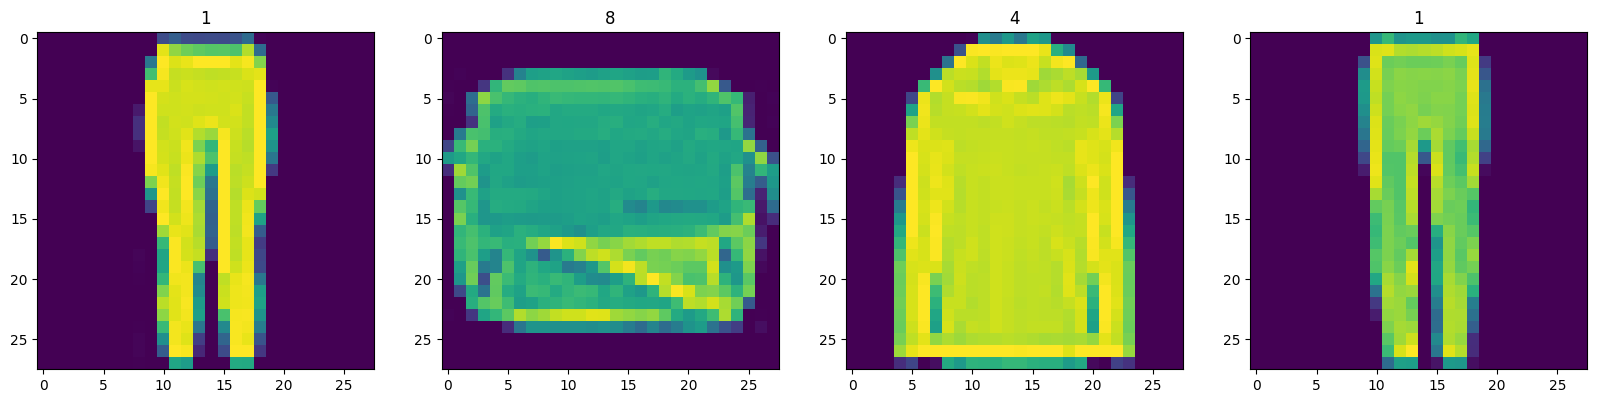

In [10]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx in range(4):
  #take an image
  batch = dataiterator.next()
  #show the selected image
  ax[idx].imshow(np.squeeze(batch['image']))
  #setting and displaying title, so as to know which image in dataset is displayed
  ax[idx].title.set_text(batch['label'])

**Data PROCESSING**

In [15]:
#Scale and return images
def scale_images(data):
  image = data['image']
  return image/255

map, cache, shuffle, batch, prefetch

In [18]:
ds = tfds.load('fashion_mnist',split = 'train')
#Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
#Cache the dataset for that batch
ds = ds.cache()
#Shuffle it up
ds = ds.shuffle(60000)
#Batch into 128 images per sample
ds = ds.batch(128)
#Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [19]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

**Building the neural network - generator and discriminator**

In [20]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [35]:
def build_generator():
  model = Sequential()
  #Takes in random values and reshapes it to 7*7*128
  model.add(Dense(7*7*128, input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  #Upsampling in block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Down sampling block 1
  model.add(Conv2D(128, 4, padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Down sampling block 2
  model.add(Conv2D(128, 4, padding = 'same'))
  model.add(LeakyReLU(0.2))

  #Conv layer to get to one channel
  model.add(Conv2D(1,4,padding='same',activation = 'sigmoid'))
  return model

In [59]:
generator = build_generator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
generator.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_25 (LeakyReLU)           │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_27 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_28 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_29 (LeakyReLU)           │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
img = generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


In [53]:
img.shape

(4, 28, 28, 1)

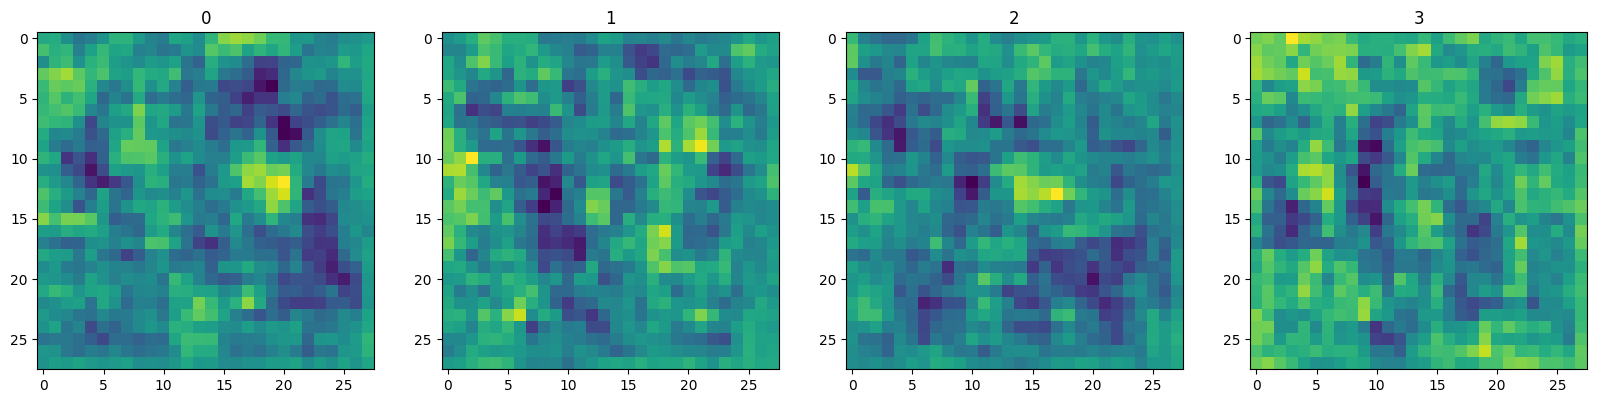

In [40]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx,img in enumerate(img):
  #show the selected image
  ax[idx].imshow(np.squeeze(img))
  #setting and displaying title, so as to know which image in dataset is displayed
  ax[idx].title.set_text(idx)

**Build discriminator**

In [47]:
def build_discriminator():
  model = Sequential()

  #First Conv Block
  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0,4))

  #Second Conv Block
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Third Conv Block
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Fourth Conv Block
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  #Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  return model

In [48]:
discriminator = build_discriminator()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
discriminator.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
#img.shape
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


array([[0.4982599 ],
       [0.49810332],
       [0.49813765],
       [0.49801922]], dtype=float32)

**Custom Training Loop**

Setup losses and optimizers

In [56]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [57]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build Subclasses Model

In [58]:
from tensorflow.keras.models import Model

In [64]:
tf.concat([tf.zeros_like(tf.random.normal((6,128))),tf.ones_like(tf.random.normal((6,128)))],axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [75]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    super().compile(*args, **kwargs)
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training = False)

    #Train the discriminator
    with tf.GradientTape() as d_tape:

      #Pass the real and fake images to the discriminator model
      yhat_real = self.discriminator(real_images, training = True)
      yhat_fake = self.discriminator(fake_images, training = True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

      #Create labels for real and fake images
      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis = 0)

      #Add some noise to the outputs
      noise_real = 0.15 * tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis = 0)

      #Calculate loss
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    #Apply backpropogation - nn Learn
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      gen_images = self.generator(tf.random.normal((128,128,1)),training=True)
      predicted_labels = self.discriminator(gen_images, training = False)
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

    return {"d_loss":total_d_loss, "g_loss": total_g_loss}


In [76]:
fashgan = FashionGAN(generator, discriminator)

In [77]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

Build callback

In [68]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [69]:
class ModelMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim
  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'))

**Train**

In [70]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [78]:
hist = fashgan.fit(ds, epochs = 20, callbacks=[ModelMonitor()])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 225ms/step - d_loss: 0.4898 - g_loss: 1.2574
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - d_loss: 0.5351 - g_loss: 1.6560
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 96s 205ms/step - d_loss: 0.7008 - g_loss: 0.6891
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - d_loss: 0.6962 - g_loss: 0.6767
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - d_loss: 0.6911 - g_loss: 0.6989
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - d_loss: 0.6968 - g_loss: 0.6780
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 204ms/step - d_loss: 0.6917 - g_loss: 0.6928
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 206ms/step - d_loss: 0.6954 - g_loss: 0.6746
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 203ms/step - d_loss: 0.6810 - g_loss: 0.7362
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - d_loss: 0.6813 - g_loss: 0.7295
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 203ms/step - d_loss: 0.6818 - g_loss: 0.7125
Epoch 12/20
4

**Review Performance**

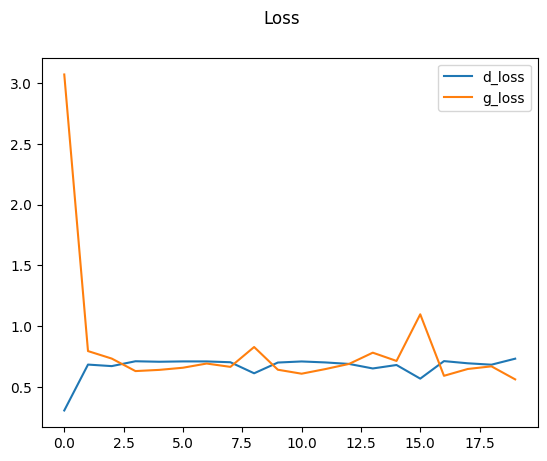

In [79]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()
#hist.history

In [80]:
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


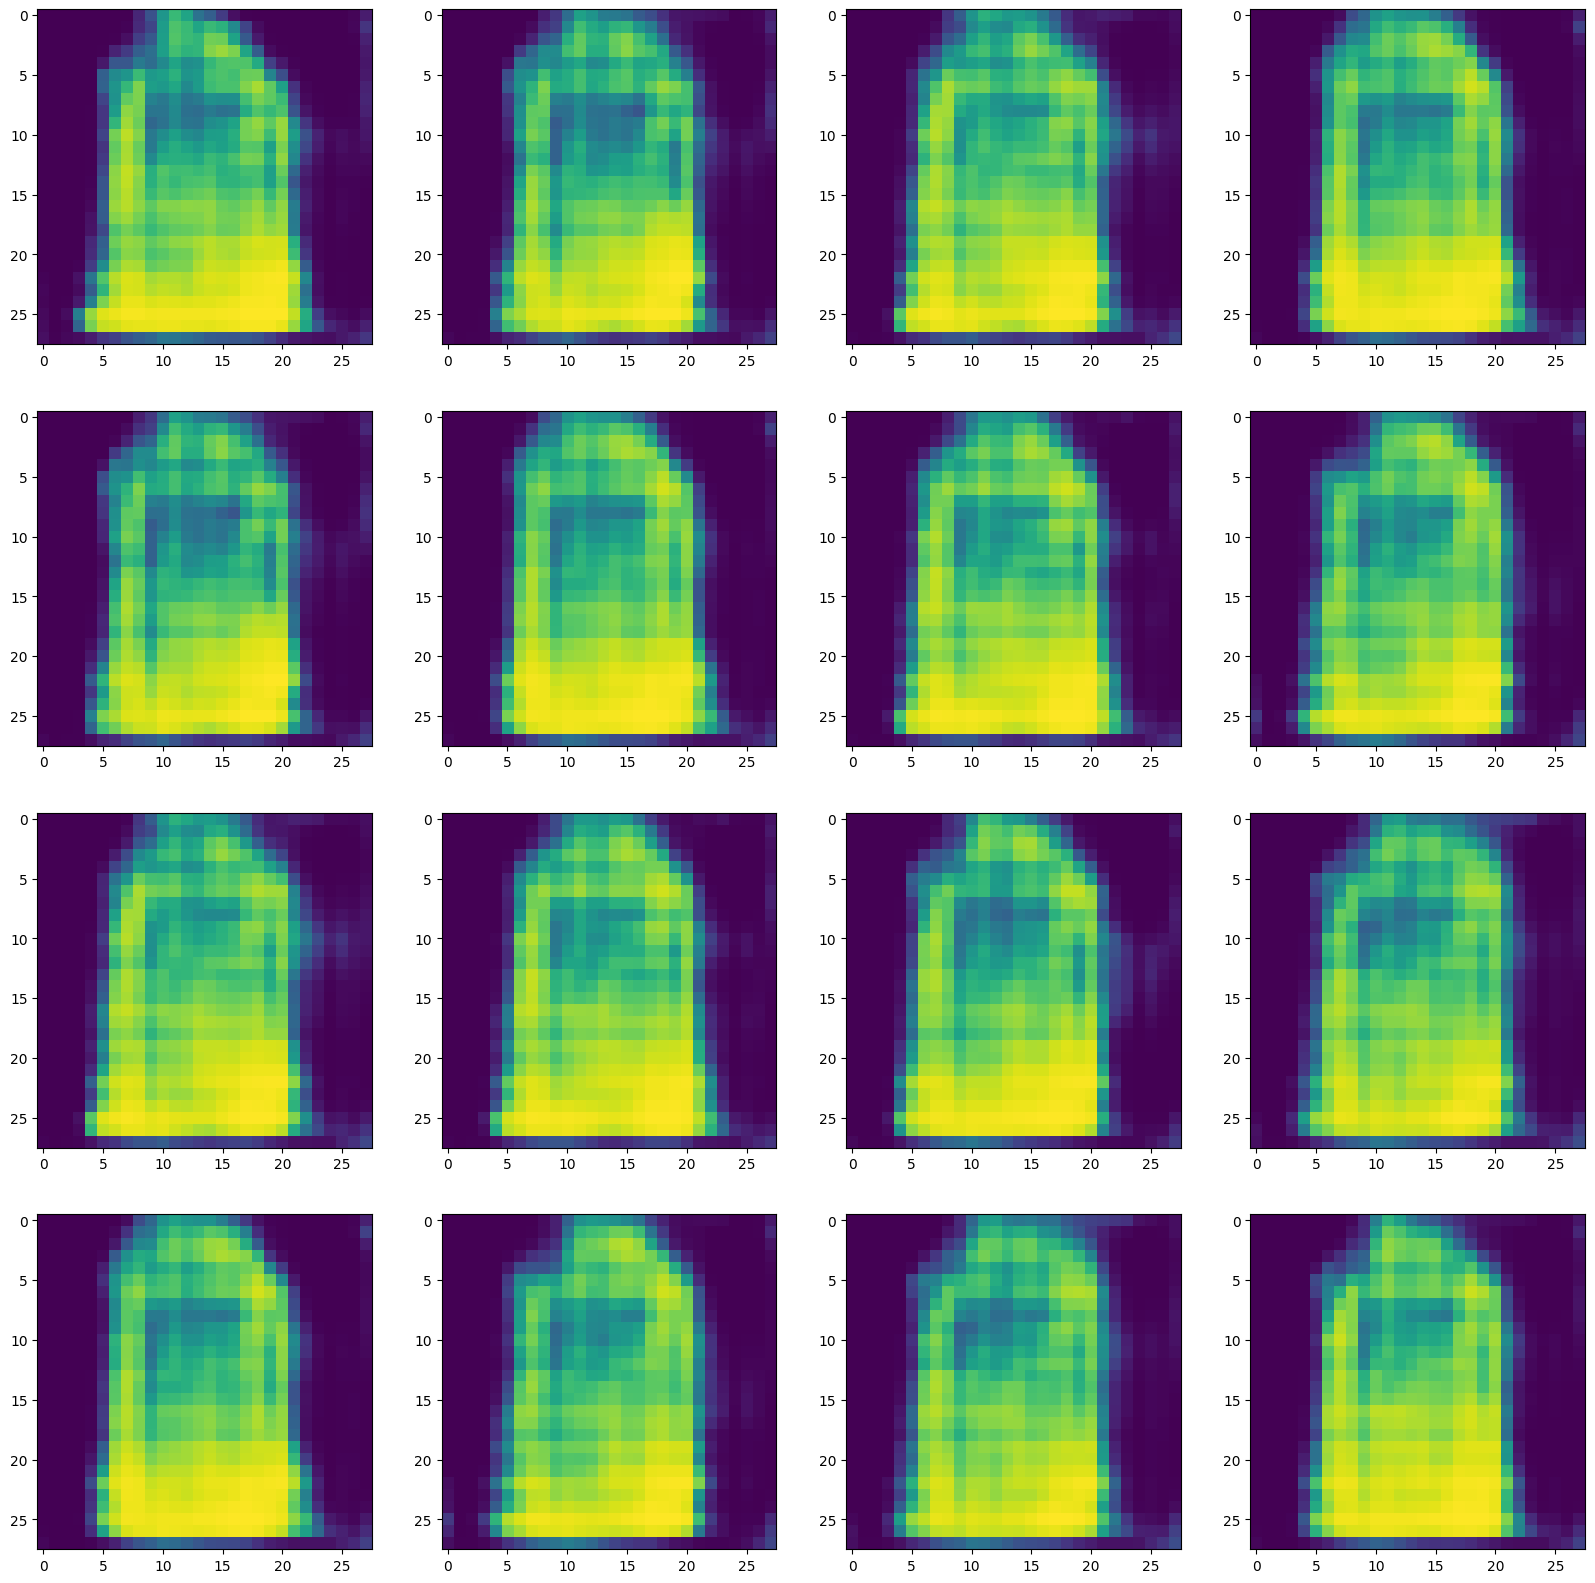

In [81]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

If you train the same for 2000 epochs, you can get perfect images.

Save the Model

In [82]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')